In [1]:
import numpy as np
import pandas as pd

### Load the training data:
* normalize XYZ with the 1st Atom
* get the distance of each 2 Atoms
* get the angle of each 3 Atoms
* get the angle of each 5 Atoms

In [2]:
PATH = 'test01.pdb'

In [3]:
data = pd.read_csv(PATH,sep='\s+')

data.columns = ['REMARK','4','1DPP','COMPLIES','X','Y','Z','2.0,','18-NOV-1998']
display(data)

REMARK    4 1DPP  COMPLIES      X      Y      Z  2.0,  18-NOV-1998
ATOM       1   C1  OLA         1  44.29  24.62  58.04   1.0          0.0
ATOM       2   C2  OLA         1  44.63  25.19  56.66   1.0          0.0
ATOM       3   C3  OLA         1  46.04  24.71  56.29   1.0          0.0
ATOM       4   C4  OLA         1  46.63  25.14  54.94   1.0          0.0
ATOM       5   C5  OLA         1  48.05  24.57  54.94   1.0          0.0
ATOM       6   C6  OLA         1  48.83  25.06  53.72   1.0          0.0
ATOM       7   C7  OLA         1  48.14  24.56  52.45   1.0          0.0
ATOM       8   C8  OLA         1  48.63  24.69  51.00   1.0          0.0
ATOM       9   C9  OLA         1  47.74  24.05  49.94   1.0          0.0
ATOM      10  C10  OLA         1  47.84  24.38  48.59   1.0          0.0
ATOM      11  C11  OLA         1  48.72  25.47  47.99   1.0          0.0
ATOM      12  C12  OLA         1  48.41  25.61  46.50   1.0          0.0
ATOM      13  C13  OLA         1  48.72  24.41  45.60   1.0          0.0
ATOM      14  C14  OLA         1  48.48  24.71  44.12   1.0          0.0
ATOM      15  C15  OLA         1  48.57  23.44  43.28   1.0          0.0
ATOM      16  C16  OLA         1  48.50  23.68  41.77   1.0          0.0
ATOM      17  C17  OLA         1  48.90  22.41  41.02   1.0          0.0
ATOM      18  C18  OLA         1  48.76  22.47  39.50   1.0          0.0
ATOM      19  O19  OLA         1  47.93  23.21  38.97   1.0          0.0
ATOM      20  O20  OLA         1  49.74  21.80  38.83   1.0          0.0
ATOM      21  H21  OLA         1  49.49  22.15  37.93   1.0          0.0

### Get the angle of each 3 Atoms

In [4]:
def get_angle(a, b, c):
    ba = a - b
    bc = c - b
    cosine_angle = np.dot(ba, bc) / (np.linalg.norm(ba) * np.linalg.norm(bc))
    angle = np.arccos(cosine_angle)
    return(np.degrees(angle))

def dots_angle(data):
    data.index = range(len(data))
    angles = [0]
    for k in range(len(data)-2):
        a = data.loc[k, ['X', 'Y', 'Z']]
        b = data.loc[k+1, ['X', 'Y', 'Z']]
        c = data.loc[k+2, ['X', 'Y', 'Z']]
        angles.append(get_angle(a, b, c))
    angles.append(0)
    return(angles)

In [5]:
data['dots-angle'] = dots_angle(data)
display(data)

REMARK    4 1DPP  COMPLIES      X      Y      Z  2.0,  18-NOV-1998  \
0        1   C1  OLA         1  44.29  24.62  58.04   1.0          0.0   
1        2   C2  OLA         1  44.63  25.19  56.66   1.0          0.0   
2        3   C3  OLA         1  46.04  24.71  56.29   1.0          0.0   
3        4   C4  OLA         1  46.63  25.14  54.94   1.0          0.0   
4        5   C5  OLA         1  48.05  24.57  54.94   1.0          0.0   
5        6   C6  OLA         1  48.83  25.06  53.72   1.0          0.0   
6        7   C7  OLA         1  48.14  24.56  52.45   1.0          0.0   
7        8   C8  OLA         1  48.63  24.69  51.00   1.0          0.0   
8        9   C9  OLA         1  47.74  24.05  49.94   1.0          0.0   
9       10  C10  OLA         1  47.84  24.38  48.59   1.0          0.0   
10      11  C11  OLA         1  48.72  25.47  47.99   1.0          0.0   
11      12  C12  OLA         1  48.41  25.61  46.50   1.0          0.0   
12      13  C13  OLA         1  48.72  24.41  45.60   1.0          0.0   
13      14  C14  OLA         1  48.48  24.71  44.12   1.0          0.0   
14      15  C15  OLA         1  48.57  23.44  43.28   1.0          0.0   
15      16  C16  OLA         1  48.50  23.68  41.77   1.0          0.0   
16      17  C17  OLA         1  48.90  22.41  41.02   1.0          0.0   
17      18  C18  OLA         1  48.76  22.47  39.50   1.0          0.0   
18      19  O19  OLA         1  47.93  23.21  38.97   1.0          0.0   
19      20  O20  OLA         1  49.74  21.80  38.83   1.0          0.0   
20      21  H21  OLA         1  49.49  22.15  37.93   1.0          0.0   

    dots-angle  
0     0.000000  
1   107.748079  
2   118.529798  
3   104.618734  
4   110.738952  
5   109.130631  
6   127.755005  
7   115.752242  
8   122.155375  
9   126.320389  
10  109.403913  
11  117.388916  
12  112.535424  
13  111.125859  
14  114.208054  
15  109.992593  
16  115.575398  
17  120.894351  
18   29.208989  
19   69.045526  
20    0.000000

### Normalize XYZ with the 1st Atom

In [6]:
data[['X','Y','Z']] = data[['X','Y','Z']] - data.loc[0, ['X','Y','Z']]
display(data)

REMARK    4 1DPP  COMPLIES     X     Y      Z  2.0,  18-NOV-1998  \
0        1   C1  OLA         1     0     0      0   1.0          0.0   
1        2   C2  OLA         1  0.34  0.57  -1.38   1.0          0.0   
2        3   C3  OLA         1  1.75  0.09  -1.75   1.0          0.0   
3        4   C4  OLA         1  2.34  0.52   -3.1   1.0          0.0   
4        5   C5  OLA         1  3.76 -0.05   -3.1   1.0          0.0   
5        6   C6  OLA         1  4.54  0.44  -4.32   1.0          0.0   
6        7   C7  OLA         1  3.85 -0.06  -5.59   1.0          0.0   
7        8   C8  OLA         1  4.34  0.07  -7.04   1.0          0.0   
8        9   C9  OLA         1  3.45 -0.57   -8.1   1.0          0.0   
9       10  C10  OLA         1  3.55 -0.24  -9.45   1.0          0.0   
10      11  C11  OLA         1  4.43  0.85 -10.05   1.0          0.0   
11      12  C12  OLA         1  4.12  0.99 -11.54   1.0          0.0   
12      13  C13  OLA         1  4.43 -0.21 -12.44   1.0          0.0   
13      14  C14  OLA         1  4.19  0.09 -13.92   1.0          0.0   
14      15  C15  OLA         1  4.28 -1.18 -14.76   1.0          0.0   
15      16  C16  OLA         1  4.21 -0.94 -16.27   1.0          0.0   
16      17  C17  OLA         1  4.61 -2.21 -17.02   1.0          0.0   
17      18  C18  OLA         1  4.47 -2.15 -18.54   1.0          0.0   
18      19  O19  OLA         1  3.64 -1.41 -19.07   1.0          0.0   
19      20  O20  OLA         1  5.45 -2.82 -19.21   1.0          0.0   
20      21  H21  OLA         1   5.2 -2.47 -20.11   1.0          0.0   

    dots-angle  
0     0.000000  
1   107.748079  
2   118.529798  
3   104.618734  
4   110.738952  
5   109.130631  
6   127.755005  
7   115.752242  
8   122.155375  
9   126.320389  
10  109.403913  
11  117.388916  
12  112.535424  
13  111.125859  
14  114.208054  
15  109.992593  
16  115.575398  
17  120.894351  
18   29.208989  
19   69.045526  
20    0.000000

### Get the distance of each 2 Atoms

In [7]:
def dots_distance(data):
    data.index = range(len(data))
    distances = []
    for k in range(len(data)-1):
        p1 = data.loc[k, ['X', 'Y', 'Z']]
        p2 = data.loc[k+1, ['X', 'Y', 'Z']]
        squared_dist = np.sum((p1-p2)**2, axis=0)
        dist = np.sqrt(squared_dist)
        distances.append(dist)
    distances.append(0)
    return(distances)

In [8]:
data['dots-distance'] = dots_distance(data)
display(data)

REMARK    4 1DPP  COMPLIES     X     Y      Z  2.0,  18-NOV-1998  \
0        1   C1  OLA         1     0     0      0   1.0          0.0   
1        2   C2  OLA         1  0.34  0.57  -1.38   1.0          0.0   
2        3   C3  OLA         1  1.75  0.09  -1.75   1.0          0.0   
3        4   C4  OLA         1  2.34  0.52   -3.1   1.0          0.0   
4        5   C5  OLA         1  3.76 -0.05   -3.1   1.0          0.0   
5        6   C6  OLA         1  4.54  0.44  -4.32   1.0          0.0   
6        7   C7  OLA         1  3.85 -0.06  -5.59   1.0          0.0   
7        8   C8  OLA         1  4.34  0.07  -7.04   1.0          0.0   
8        9   C9  OLA         1  3.45 -0.57   -8.1   1.0          0.0   
9       10  C10  OLA         1  3.55 -0.24  -9.45   1.0          0.0   
10      11  C11  OLA         1  4.43  0.85 -10.05   1.0          0.0   
11      12  C12  OLA         1  4.12  0.99 -11.54   1.0          0.0   
12      13  C13  OLA         1  4.43 -0.21 -12.44   1.0          0.0   
13      14  C14  OLA         1  4.19  0.09 -13.92   1.0          0.0   
14      15  C15  OLA         1  4.28 -1.18 -14.76   1.0          0.0   
15      16  C16  OLA         1  4.21 -0.94 -16.27   1.0          0.0   
16      17  C17  OLA         1  4.61 -2.21 -17.02   1.0          0.0   
17      18  C18  OLA         1  4.47 -2.15 -18.54   1.0          0.0   
18      19  O19  OLA         1  3.64 -1.41 -19.07   1.0          0.0   
19      20  O20  OLA         1  5.45 -2.82 -19.21   1.0          0.0   
20      21  H21  OLA         1   5.2 -2.47 -20.11   1.0          0.0   

    dots-angle  dots-distance  
0     0.000000       1.531307  
1   107.748079       1.534731  
2   118.529798       1.534764  
3   104.618734       1.530131  
4   110.738952       1.528692  
5   109.130631       1.529379  
6   127.755005       1.536066  
7   115.752242       1.524893  
8   122.155375       1.393341  
9   126.320389       1.523975  
10  109.403913       1.528332  
11  117.388916       1.531698  
12  112.535424       1.529052  
13  111.125859       1.525320  
14  114.208054       1.530555  
15  109.992593       1.528202  
16  115.575398       1.527613  
17  120.894351       1.231828  
18   29.208989       2.298652  
19   69.045526       0.997497  
20    0.000000       0.000000

### Get the angle of each 5 Atoms

In [9]:
import math

# Equation of a plane through three points
# https://kitchingroup.cheme.cmu.edu/blog/2015/01/18/Equation-of-a-plane-through-three-points/
def dots_plane(a, b, c):
    p1 = np.array(list(a))
    p2 = np.array(list(b))
    p3 = np.array(list(c))
    v1 = p3 - p1
    v2 = p2 - p1
    return(np.cross(v1, v2))

# Find the Angle between two planes in 3D.
# https://www.geeksforgeeks.org/angle-between-two-planes-in-3d/
def planes_angle(a1, b1, c1, a2, b2, c2):
	
	d = ( a1 * a2 + b1 * b2 + c1 * c2 )
	e1 = math.sqrt( a1 * a1 + b1 * b1 + c1 * c1)
	e2 = math.sqrt( a2 * a2 + b2 * b2 + c2 * c2)
	d = d / (e1 * e2)
	A = math.degrees(math.acos(d))
	return(A)

def surface_angle(data):
    data.index = range(len(data))
    angles = [0,0]
    for k in range(len(data)-4):
        a = data.loc[k, ['X', 'Y', 'Z']]
        b = data.loc[k+1, ['X', 'Y', 'Z']]
        c = data.loc[k+2, ['X', 'Y', 'Z']]
        d = data.loc[k+3, ['X', 'Y', 'Z']]
        e = data.loc[k+4, ['X', 'Y', 'Z']]
        x1, y1, z1 = dots_plane(a,b,c)
        x2, y2, z2 = dots_plane(c,b,e)
        A = planes_angle(x1, y1, z1, x2, y2, z2)
        angles.append(A)
    angles.append(0)
    angles.append(0)
    return(angles)

In [10]:
data['planes-angle'] = surface_angle(data)
display(data)

REMARK    4 1DPP  COMPLIES     X     Y      Z  2.0,  18-NOV-1998  \
0        1   C1  OLA         1     0     0      0   1.0          0.0   
1        2   C2  OLA         1  0.34  0.57  -1.38   1.0          0.0   
2        3   C3  OLA         1  1.75  0.09  -1.75   1.0          0.0   
3        4   C4  OLA         1  2.34  0.52   -3.1   1.0          0.0   
4        5   C5  OLA         1  3.76 -0.05   -3.1   1.0          0.0   
5        6   C6  OLA         1  4.54  0.44  -4.32   1.0          0.0   
6        7   C7  OLA         1  3.85 -0.06  -5.59   1.0          0.0   
7        8   C8  OLA         1  4.34  0.07  -7.04   1.0          0.0   
8        9   C9  OLA         1  3.45 -0.57   -8.1   1.0          0.0   
9       10  C10  OLA         1  3.55 -0.24  -9.45   1.0          0.0   
10      11  C11  OLA         1  4.43  0.85 -10.05   1.0          0.0   
11      12  C12  OLA         1  4.12  0.99 -11.54   1.0          0.0   
12      13  C13  OLA         1  4.43 -0.21 -12.44   1.0          0.0   
13      14  C14  OLA         1  4.19  0.09 -13.92   1.0          0.0   
14      15  C15  OLA         1  4.28 -1.18 -14.76   1.0          0.0   
15      16  C16  OLA         1  4.21 -0.94 -16.27   1.0          0.0   
16      17  C17  OLA         1  4.61 -2.21 -17.02   1.0          0.0   
17      18  C18  OLA         1  4.47 -2.15 -18.54   1.0          0.0   
18      19  O19  OLA         1  3.64 -1.41 -19.07   1.0          0.0   
19      20  O20  OLA         1  5.45 -2.82 -19.21   1.0          0.0   
20      21  H21  OLA         1   5.2 -2.47 -20.11   1.0          0.0   

    dots-angle  dots-distance  planes-angle  
0     0.000000       1.531307      0.000000  
1   107.748079       1.534731      0.000000  
2   118.529798       1.534764      5.075240  
3   104.618734       1.530131      9.337508  
4   110.738952       1.528692     24.068684  
5   109.130631       1.529379    113.983438  
6   127.755005       1.536066      9.021707  
7   115.752242       1.524893     11.185341  
8   122.155375       1.393341     20.419322  
9   126.320389       1.523975    162.484362  
10  109.403913       1.528332     21.414981  
11  117.388916       1.531698    110.281996  
12  112.535424       1.529052      4.791015  
13  111.125859       1.525320      3.421830  
14  114.208054       1.530555     19.890819  
15  109.992593       1.528202      7.943553  
16  115.575398       1.527613     16.769512  
17  120.894351       1.231828     36.479366  
18   29.208989       2.298652     10.177698  
19   69.045526       0.997497      0.000000  
20    0.000000       0.000000      0.000000

### Load all protein data

In [11]:
PATH = 'CeramideMix-lipids-Test.pdb'

In [14]:
data_all = pd.read_csv(PATH,sep='\s+')

data_all.columns = ['REMARK','Cx','1DPP','COMPLIES','X','Y','Z','2.0,','18-NOV-1998']
data_all.index = range(len(data_all))
display(data_all)

REMARK   Cx 1DPP  COMPLIES      X      Y      Z  2.0,  18-NOV-1998
0          1.0   C1  OLA       1.0  44.29  24.62  58.04   1.0          0.0
1          2.0   C2  OLA       1.0  44.63  25.19  56.66   1.0          0.0
2          3.0   C3  OLA       1.0  46.04  24.71  56.29   1.0          0.0
3          4.0   C4  OLA       1.0  46.63  25.14  54.94   1.0          0.0
4          5.0   C5  OLA       1.0  48.05  24.57  54.94   1.0          0.0
...        ...  ...  ...       ...    ...    ...    ...   ...          ...
10632  26383.0  C21  FA2    5566.0  84.79  13.09  58.79   1.0          0.0
10633  26384.0  C22  FA2    5566.0  86.30  13.22  58.99   1.0          0.0
10634  26385.0  C23  FA2    5566.0  86.54  13.91  60.34   1.0          0.0
10635  26386.0  C24  FA2    5566.0  87.97  13.77  60.87   1.0          0.0
10636      NaN  NaN  NaN       NaN    NaN    NaN    NaN   NaN          NaN

[10637 rows x 9 columns]

In [25]:
COMPLIES = np.unique(data_all['COMPLIES'])[:-1]
protein_list = [data_all[data_all['COMPLIES'] == COMPLIES[k]].copy() for k in range(len(COMPLIES))]

In [15]:
start_id = np.array(data_all[np.logical_and(data_all['1DPP'] == 'OLA', data_all['Cx'] == 'C1')].index)
end_id = start_id + 21
protein_list = [data_all.iloc[start_id[k]:end_id[k]].copy() for k in range(len(start_id))]

In [26]:
display(protein_list[17])
n_samples = len(protein_list)
n_samples

REMARK   Cx 1DPP  COMPLIES      X      Y      Z  2.0,  18-NOV-1998
385   386.0   C1  CR2      18.0  20.73  83.50  57.13   1.0          0.0
386   387.0   C2  CR2      18.0  21.32  82.60  56.05   1.0          0.0
387   388.0   C3  CR2      18.0  22.03  83.46  55.01   1.0          0.0
388   389.0   C4  CR2      18.0  21.15  84.51  54.33   1.0          0.0
389   390.0   C5  CR2      18.0  21.90  85.24  53.21   1.0          0.0
390   391.0   C6  CR2      18.0  21.20  84.98  51.87   1.0          0.0
391   392.0   C7  CR2      18.0  22.22  85.20  50.75   1.0          0.0
392   393.0   C8  CR2      18.0  21.61  85.02  49.37   1.0          0.0
393   394.0   C9  CR2      18.0  22.76  84.97  48.36   1.0          0.0
394   395.0  C10  CR2      18.0  22.27  84.96  46.91   1.0          0.0
395   396.0  C11  CR2      18.0  23.40  84.48  46.00   1.0          0.0
396   397.0  C12  CR2      18.0  23.00  84.34  44.53   1.0          0.0
397   398.0  C13  CR2      18.0  24.19  84.06  43.61   1.0          0.0
398   399.0  C14  CR2      18.0  23.63  83.95  42.19   1.0          0.0
399   400.0  C15  CR2      18.0  24.52  83.87  41.13   1.0          0.0
400   401.0  C16  CR2      18.0  24.02  83.83  39.68   1.0          0.0
401   402.0  O17  CR2      18.0  23.49  85.11  39.32   1.0          0.0
402   403.0  H18  CR2      18.0  24.29  85.71  39.22   1.0          0.0
403   404.0  C19  CR2      18.0  25.24  83.31  38.91   1.0          0.0
404   405.0  C20  CR2      18.0  24.94  83.33  37.41   1.0          0.0
405   406.0  O21  CR2      18.0  26.01  82.91  36.56   1.0          0.0
406   407.0  H22  CR2      18.0  26.04  83.47  35.73   1.0          0.0
407   408.0  N23  CR2      18.0  25.66  81.96  39.33   1.0          0.0
408   409.0  H24  CR2      18.0  24.90  81.36  39.58   1.0          0.0
409   410.0  C25  CR2      18.0  26.91  81.52  39.33   1.0          0.0
410   411.0  O26  CR2      18.0  27.81  82.20  38.86   1.0          0.0
411   412.0  C27  CR2      18.0  27.07  80.02  39.61   1.0          0.0
412   413.0  C28  CR2      18.0  26.32  79.52  40.84   1.0          0.0
413   414.0  C29  CR2      18.0  26.74  80.19  42.15   1.0          0.0
414   415.0  C30  CR2      18.0  26.84  79.21  43.31   1.0          0.0
415   416.0  C31  CR2      18.0  27.34  79.88  44.59   1.0          0.0
416   417.0  C32  CR2      18.0  26.38  81.07  44.71   1.0          0.0
417   418.0  C33  CR2      18.0  26.66  82.03  45.87   1.0          0.0
418   419.0  C34  CR2      18.0  26.57  81.46  47.29   1.0          0.0
419   420.0  C35  CR2      18.0  26.15  82.57  48.26   1.0          0.0
420   421.0  C36  CR2      18.0  26.28  82.13  49.72   1.0          0.0
421   422.0  C37  CR2      18.0  25.65  83.21  50.59   1.0          0.0
422   423.0  C38  CR2      18.0  26.11  83.14  52.05   1.0          0.0
423   424.0  C39  CR2      18.0  25.68  81.81  52.65   1.0          0.0
424   425.0  C40  CR2      18.0  26.23  81.64  54.07   1.0          0.0
425   426.0  C41  CR2      18.0  25.71  80.35  54.72   1.0          0.0
426   427.0  C42  CR2      18.0  25.90  80.31  56.24   1.0          0.0
427   428.0  C43  CR2      18.0  24.92  81.28  56.90   1.0          0.0
428   429.0  C44  CR2      18.0  24.72  81.00  58.39   1.0          0.0
429   430.0  C45  CR2      18.0  23.59  81.85  58.98   1.0          0.0
430   431.0  C46  CR2      18.0  23.45  81.55  60.47   1.0          0.0
431   432.0  C47  CR2      18.0  22.14  82.02  61.11   1.0          0.0
432   433.0  C48  CR2      18.0  21.84  81.09  62.29   1.0          0.0
433   434.0  C49  CR2      18.0  20.65  81.48  63.17   1.0          0.0

316

In [27]:
def portein_format(data):
    data.index = range(len(data))
    data[['X','Y','Z']] = data[['X','Y','Z']] - data.loc[0, ['X','Y','Z']]
    data['dots-angle'] = dots_angle(data)
    data['dots-distance'] = dots_distance(data)
    data['planes-angle'] = surface_angle(data)
    return(data)

In [28]:
portein_format_list = [portein_format(p) for p in protein_list]

In [29]:
portein_format_list[17]

REMARK   Cx 1DPP  COMPLIES     X     Y      Z  2.0,  18-NOV-1998  \
0    386.0   C1  CR2      18.0     0     0      0   1.0          0.0   
1    387.0   C2  CR2      18.0  0.59  -0.9  -1.08   1.0          0.0   
2    388.0   C3  CR2      18.0   1.3 -0.04  -2.12   1.0          0.0   
3    389.0   C4  CR2      18.0  0.42  1.01   -2.8   1.0          0.0   
4    390.0   C5  CR2      18.0  1.17  1.74  -3.92   1.0          0.0   
5    391.0   C6  CR2      18.0  0.47  1.48  -5.26   1.0          0.0   
6    392.0   C7  CR2      18.0  1.49   1.7  -6.38   1.0          0.0   
7    393.0   C8  CR2      18.0  0.88  1.52  -7.76   1.0          0.0   
8    394.0   C9  CR2      18.0  2.03  1.47  -8.77   1.0          0.0   
9    395.0  C10  CR2      18.0  1.54  1.46 -10.22   1.0          0.0   
10   396.0  C11  CR2      18.0  2.67  0.98 -11.13   1.0          0.0   
11   397.0  C12  CR2      18.0  2.27  0.84  -12.6   1.0          0.0   
12   398.0  C13  CR2      18.0  3.46  0.56 -13.52   1.0          0.0   
13   399.0  C14  CR2      18.0   2.9  0.45 -14.94   1.0          0.0   
14   400.0  C15  CR2      18.0  3.79  0.37    -16   1.0          0.0   
15   401.0  C16  CR2      18.0  3.29  0.33 -17.45   1.0          0.0   
16   402.0  O17  CR2      18.0  2.76  1.61 -17.81   1.0          0.0   
17   403.0  H18  CR2      18.0  3.56  2.21 -17.91   1.0          0.0   
18   404.0  C19  CR2      18.0  4.51 -0.19 -18.22   1.0          0.0   
19   405.0  C20  CR2      18.0  4.21 -0.17 -19.72   1.0          0.0   
20   406.0  O21  CR2      18.0  5.28 -0.59 -20.57   1.0          0.0   
21   407.0  H22  CR2      18.0  5.31 -0.03  -21.4   1.0          0.0   
22   408.0  N23  CR2      18.0  4.93 -1.54  -17.8   1.0          0.0   
23   409.0  H24  CR2      18.0  4.17 -2.14 -17.55   1.0          0.0   
24   410.0  C25  CR2      18.0  6.18 -1.98  -17.8   1.0          0.0   
25   411.0  O26  CR2      18.0  7.08  -1.3 -18.27   1.0          0.0   
26   412.0  C27  CR2      18.0  6.34 -3.48 -17.52   1.0          0.0   
27   413.0  C28  CR2      18.0  5.59 -3.98 -16.29   1.0          0.0   
28   414.0  C29  CR2      18.0  6.01 -3.31 -14.98   1.0          0.0   
29   415.0  C30  CR2      18.0  6.11 -4.29 -13.82   1.0          0.0   
30   416.0  C31  CR2      18.0  6.61 -3.62 -12.54   1.0          0.0   
31   417.0  C32  CR2      18.0  5.65 -2.43 -12.42   1.0          0.0   
32   418.0  C33  CR2      18.0  5.93 -1.47 -11.26   1.0          0.0   
33   419.0  C34  CR2      18.0  5.84 -2.04  -9.84   1.0          0.0   
34   420.0  C35  CR2      18.0  5.42 -0.93  -8.87   1.0          0.0   
35   421.0  C36  CR2      18.0  5.55 -1.37  -7.41   1.0          0.0   
36   422.0  C37  CR2      18.0  4.92 -0.29  -6.54   1.0          0.0   
37   423.0  C38  CR2      18.0  5.38 -0.36  -5.08   1.0          0.0   
38   424.0  C39  CR2      18.0  4.95 -1.69  -4.48   1.0          0.0   
39   425.0  C40  CR2      18.0   5.5 -1.86  -3.06   1.0          0.0   
40   426.0  C41  CR2      18.0  4.98 -3.15  -2.41   1.0          0.0   
41   427.0  C42  CR2      18.0  5.17 -3.19  -0.89   1.0          0.0   
42   428.0  C43  CR2      18.0  4.19 -2.22  -0.23   1.0          0.0   
43   429.0  C44  CR2      18.0  3.99  -2.5   1.26   1.0          0.0   
44   430.0  C45  CR2      18.0  2.86 -1.65   1.85   1.0          0.0   
45   431.0  C46  CR2      18.0  2.72 -1.95   3.34   1.0          0.0   
46   432.0  C47  CR2      18.0  1.41 -1.48   3.98   1.0          0.0   
47   433.0  C48  CR2      18.0  1.11 -2.41   5.16   1.0          0.0   
48   434.0  C49  CR2      18.0 -0.08 -2.02   6.04   1.0          0.0   

    dots-angle  dots-distance  planes-angle  
0     0.000000       1.524631      0.000000  
1   109.291830       1.524893      0.000000  
2   114.992732       1.529477    116.094735  
3   111.731892       1.532906     43.116257  
4   109.527230       1.534014     83.403933  
5   108.101829       1.530751     20.880563  
6   112.331686       1.519506     10.646537  
7   107.540765       1.531372      

In [57]:
df = pd.concat(portein_format_list)
df.to_csv("output/training_data.csv")

display(df)

### Drop proteins distance > 80

In [58]:
anomal_list = np.unique(df[df['dots-distance'] > 80]['COMPLIES'])
for k in range(len(anomal_list)):
    df = df[df['COMPLIES']!= anomal_list[k]]

In [76]:
df.index = range(len(df))
display(df)

REMARK   Cx 1DPP  COMPLIES     X     Y      Z  2.0,  18-NOV-1998  \
0         1.0   C1  OLA       1.0     0     0      0   1.0          0.0   
1         2.0   C2  OLA       1.0  0.34  0.57  -1.38   1.0          0.0   
2         3.0   C3  OLA       1.0  1.75  0.09  -1.75   1.0          0.0   
3         4.0   C4  OLA       1.0  2.34  0.52   -3.1   1.0          0.0   
4         5.0   C5  OLA       1.0  3.76 -0.05   -3.1   1.0          0.0   
...       ...  ...  ...       ...   ...   ...    ...   ...          ...   
8573  26382.0  C20  FA2    5566.0  0.61  0.23  23.51   1.0          0.0   
8574  26383.0  C21  FA2    5566.0  0.89  0.88  24.87   1.0          0.0   
8575  26384.0  C22  FA2    5566.0   2.4  1.01  25.07   1.0          0.0   
8576  26385.0  C23  FA2    5566.0  2.64   1.7  26.42   1.0          0.0   
8577  26386.0  C24  FA2    5566.0  4.07  1.56  26.95   1.0          0.0   

      dots-angle  dots-distance  planes-angle  
0       0.000000       1.531307      0.000000  
1     107.748079       1.534731      0.000000  
2     118.529798       1.534764      5.075240  
3     104.618734       1.530131      9.337508  
4     110.738952       1.528692     24.068684  
...          ...            ...           ...  
8573  111.410600       1.533134     14.686778  
8574  109.420751       1.528725    120.631504  
8575  107.922145       1.534992     11.685930  
8576  114.158735       1.531470      0.000000  
8577    0.000000       0.000000      0.000000  

[8578 rows x 12 columns]

### histogram

In [59]:
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio

In [60]:
def protein_hist(df,xlabel="dots-angle"):
    fig = px.histogram(df, x=xlabel, color=df['1DPP'] +'-'+ df['Cx'], nbins=100,marginal="rug")
    fig.update_layout(title="{0}, sample size: {1}".format(xlabel, n_samples))
    fig.update_layout(width=1200, height=800)
    fig.show()
    pio.write_html(fig, "output/{}_histogram.html".format(xlabel))
    pio.write_image(fig, "output/{}_histogram.png".format(xlabel))

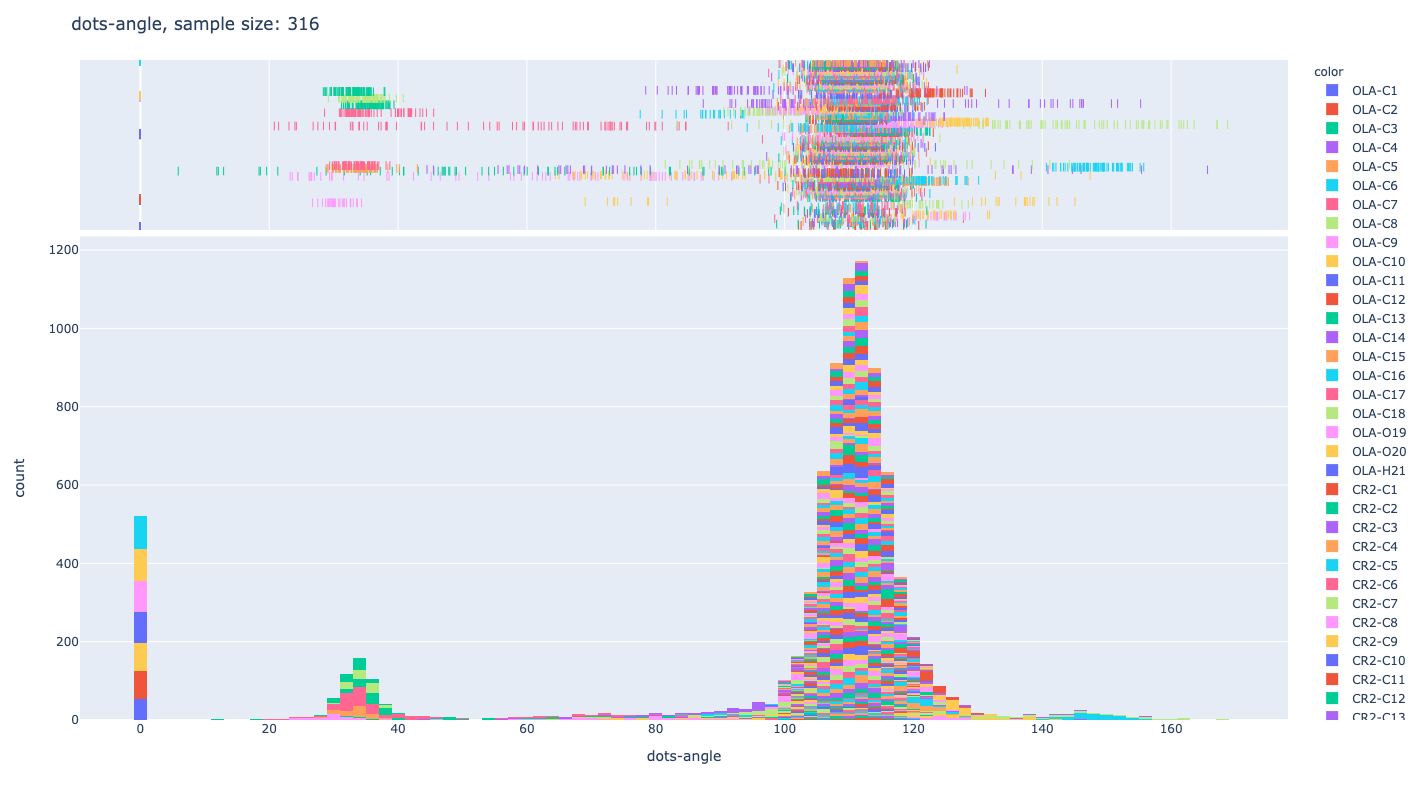

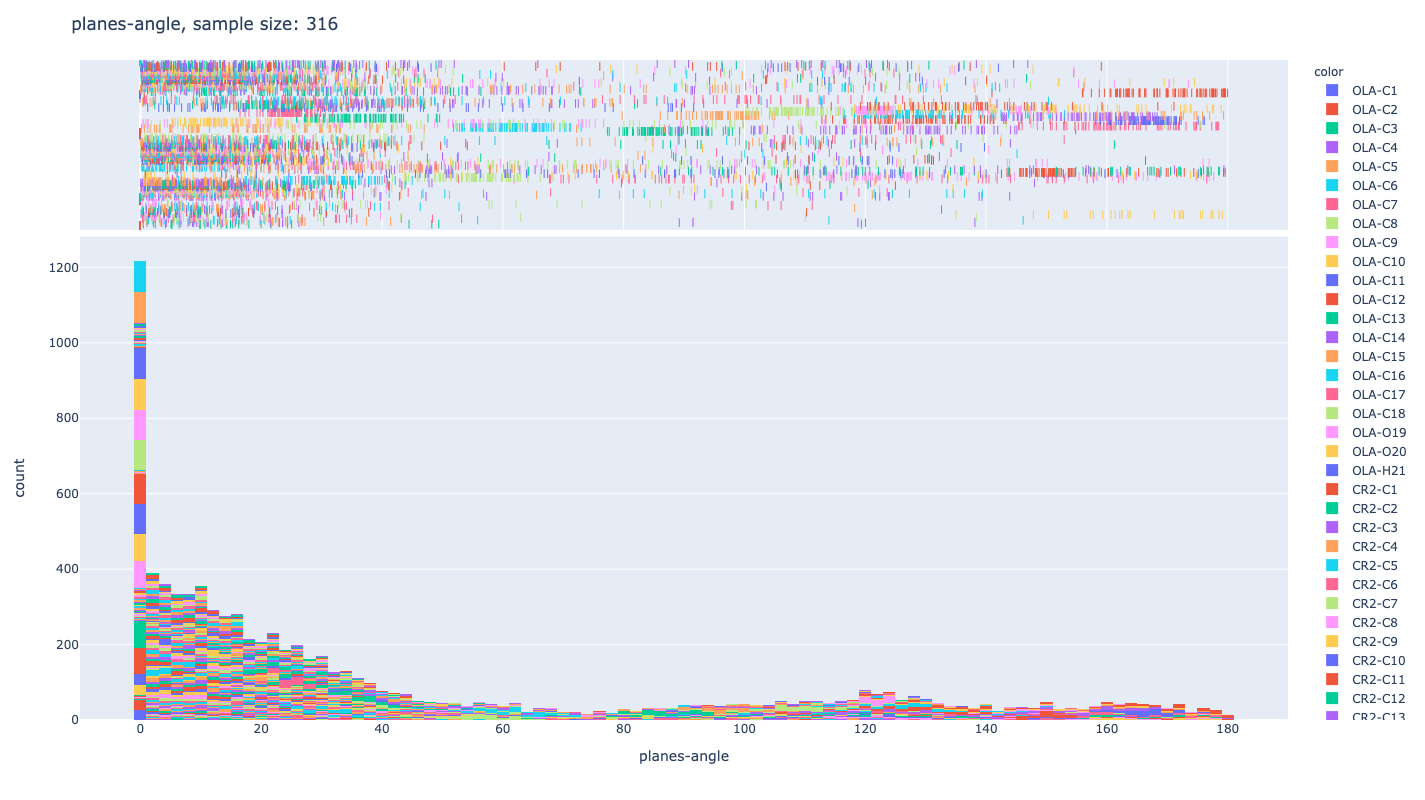

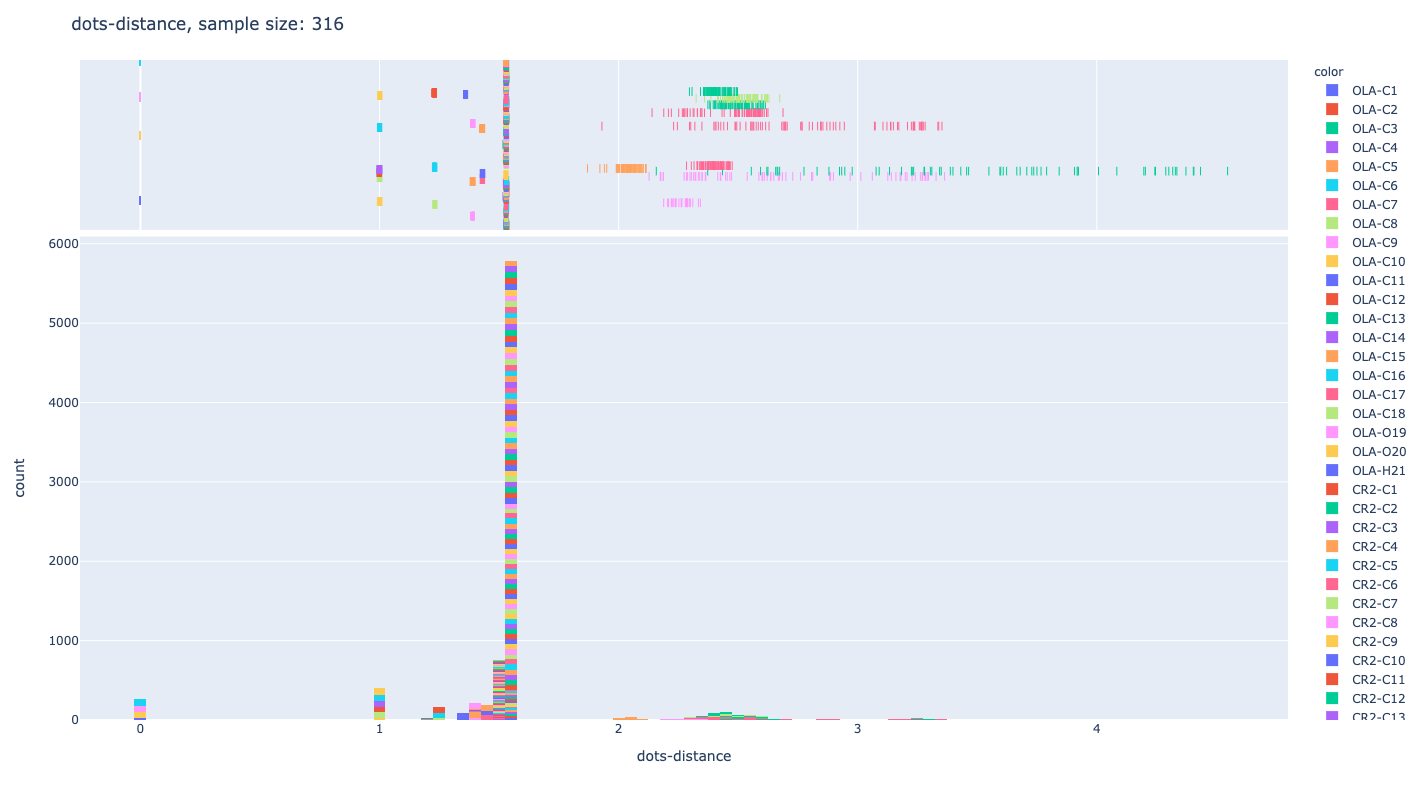

In [61]:
protein_hist(df,xlabel="dots-angle")
protein_hist(df,xlabel="planes-angle")
protein_hist(df,xlabel="dots-distance")

In [81]:
Cx = portein_format_list[0]['Cx']
protein_distr = [ df.loc[df['Cx']==c,['Cx','dots-angle','dots-distance','planes-angle']] for c in Cx ]
atom2distr = dict(zip(Cx, protein_distr))

In [82]:
def protine_sim(Cx, n_sim=1):
    sim_df = pd.concat([pd.concat([atom2distr[c][['Cx','dots-angle','dots-distance', 'planes-angle']].sample(n=1, random_state=x) for c in Cx]) for x in range(n_sim)])
    return(sim_df)

In [83]:
def protein_sim(df,xlabel="dots-angle",):
    n_sim = sum(protine_sim_df['Cx'] == 'C1')
    fig = px.histogram(df, x=xlabel, color="Cx", nbins=100,marginal="rug")
    fig.update_layout(title="Simulated {0}, n_sim: {1}".format(xlabel, n_sim))
    fig.update_layout(width=1200, height=800)
    fig.show()
    pio.write_html(fig, "output/{}_sim.html".format(xlabel))
    pio.write_image(fig, "output/{}_sim.png".format(xlabel))

In [84]:
#protine_sim_df = protine_sim(Cx, n_sim=300)

C_tmp = ["C"+str(x) for x in range(1,15)]
C_tmp

['C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'C6',
 'C7',
 'C8',
 'C9',
 'C10',
 'C11',
 'C12',
 'C13',
 'C14']

In [85]:
protine_sim_df = protine_sim(C_tmp, n_sim=500)

display(protine_sim_df)
protine_sim_df.to_csv("output/simulated_data.csv")

Cx  dots-angle  dots-distance  planes-angle
7851   C1  128.819376       1.227884    178.960779
7853   C2  128.325202       1.525975     68.180293
7854   C3  112.262890       1.534959    127.369379
7855   C4  104.832646       1.537368      6.081505
7856   C5  101.956365       1.530653     28.484674
...   ...         ...            ...           ...
1626  C10  112.110872       1.522170      4.935211
1627  C11  109.855954       1.527809      8.234567
1628  C12  116.027366       1.535643      6.611752
1629  C13  109.678593       1.518223     24.507867
1630  C14  123.942043       1.393054    108.704111

[7000 rows x 4 columns]

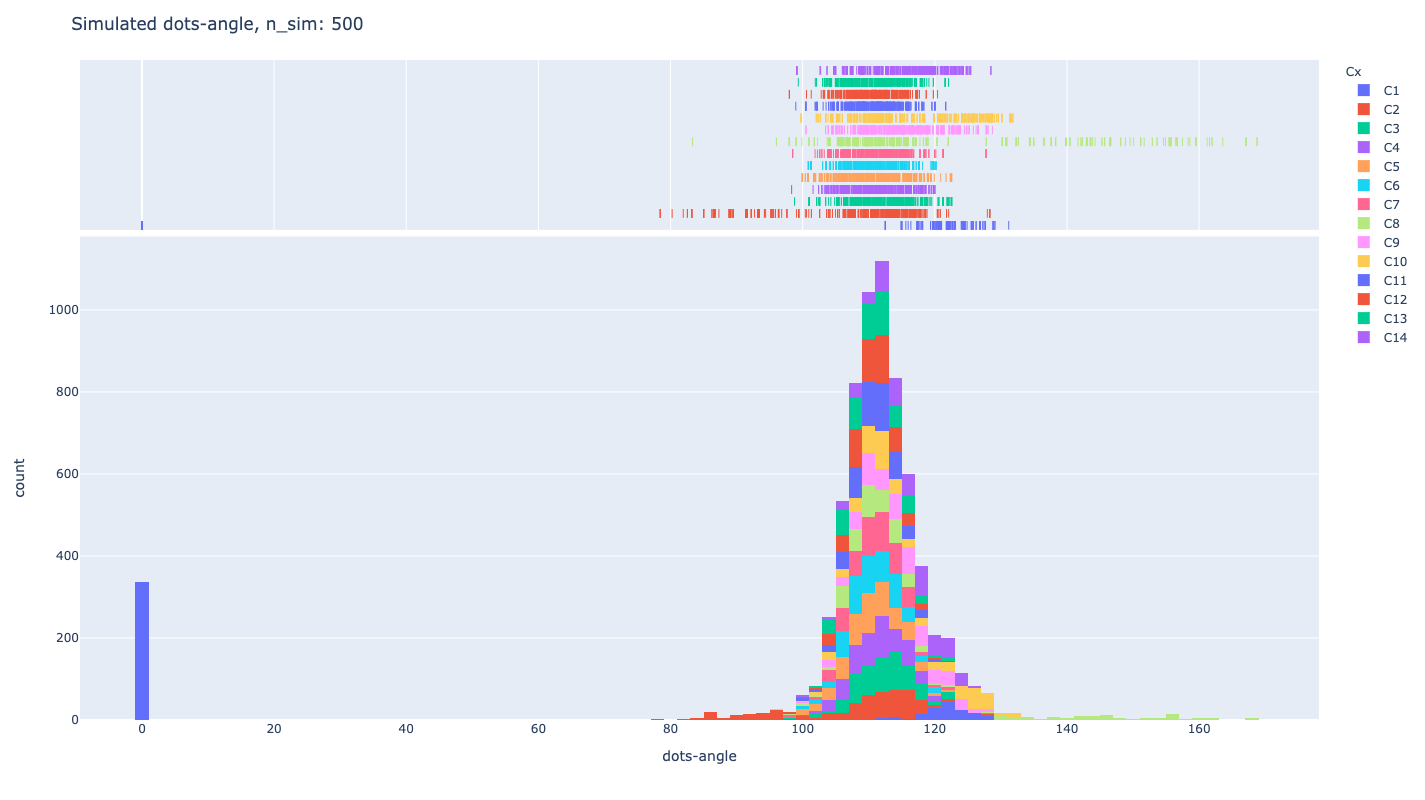

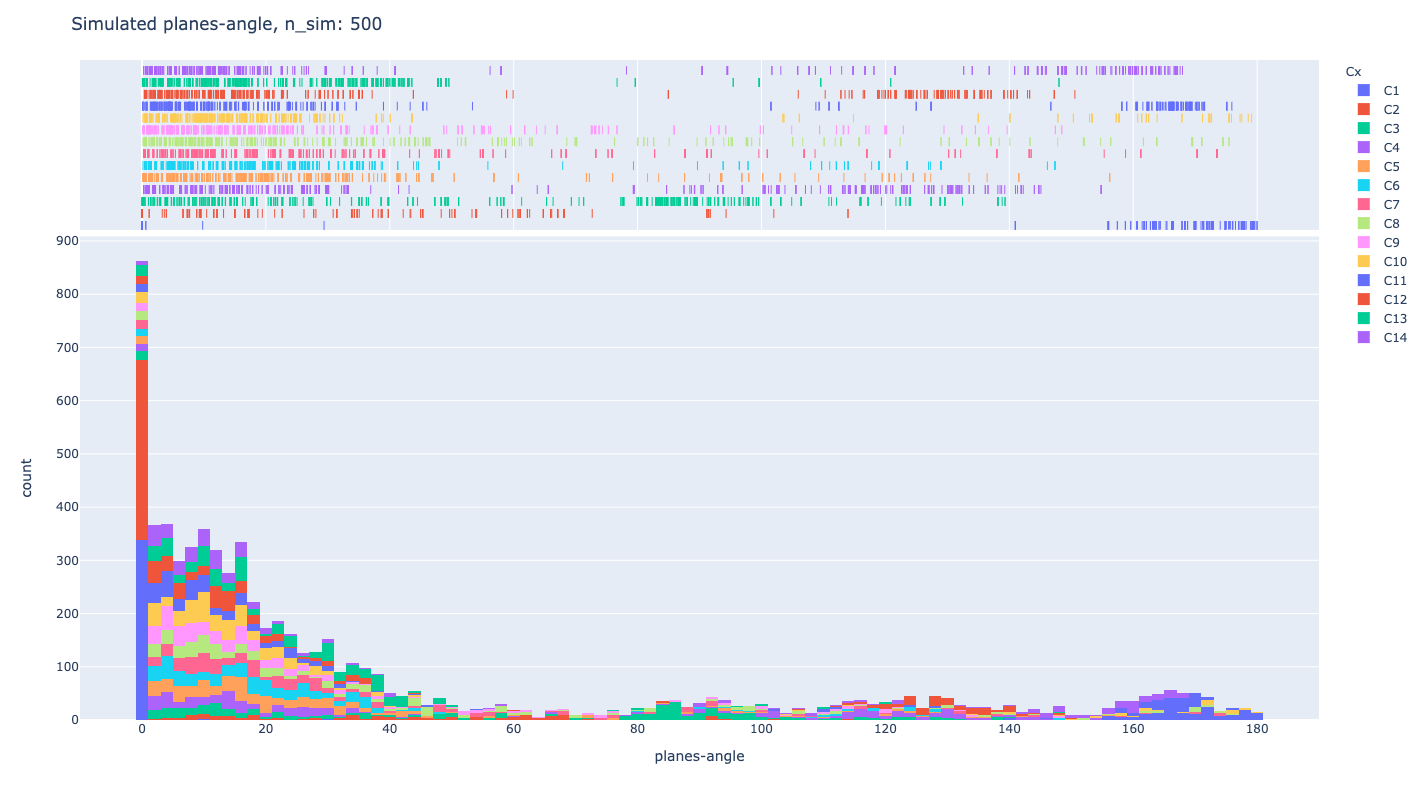

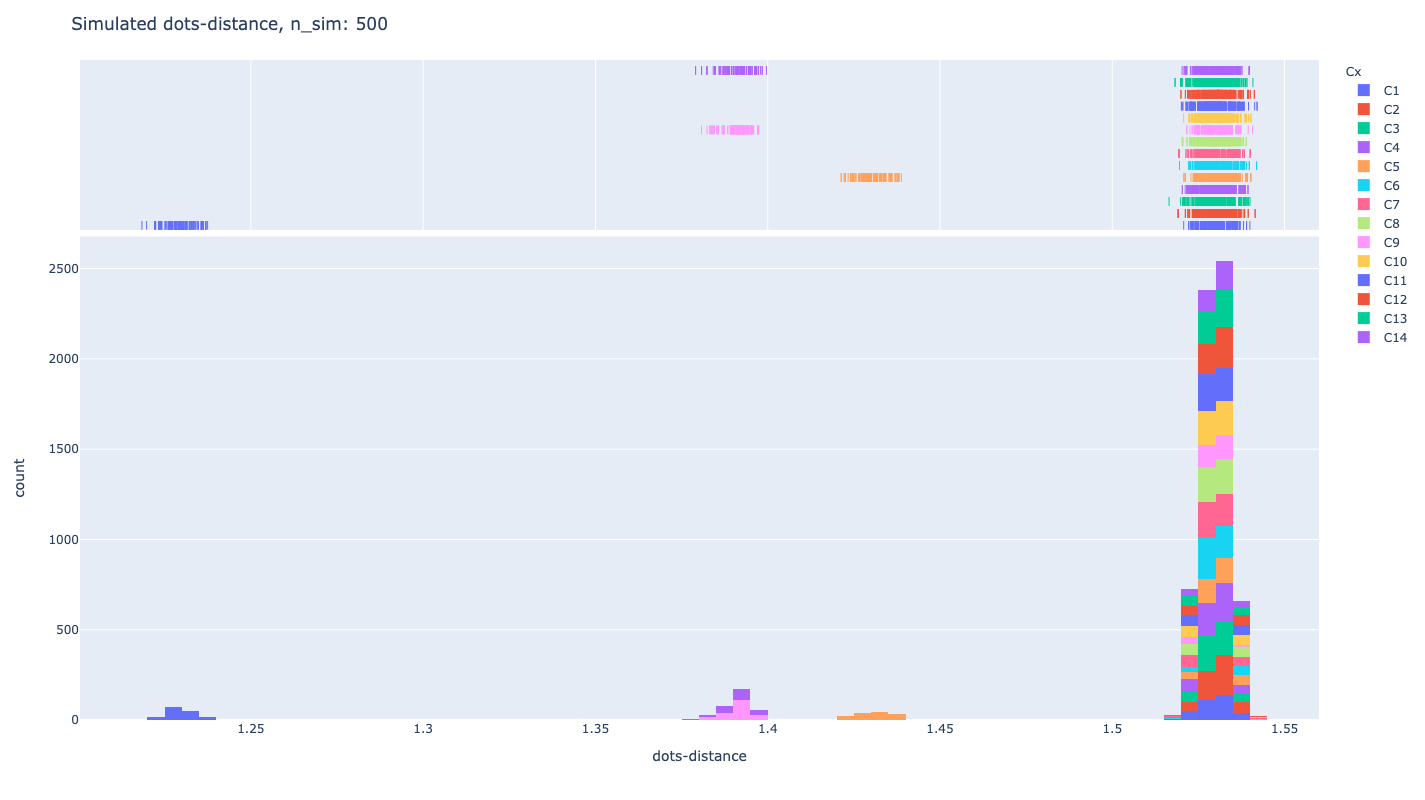

In [86]:
protein_sim(protine_sim_df,xlabel="dots-angle")
protein_sim(protine_sim_df,xlabel="planes-angle")
protein_sim(protine_sim_df,xlabel="dots-distance")

In [89]:
import os
os.system("gsutil -m cp output/*.html gs://protein-dynamics-ai/")
os.system("gsutil -m cp output/*.png gs://protein-dynamics-ai/")
os.system("gsutil -m cp output/*.csv gs://protein-dynamics-ai/")

30720